In [1]:
## Libraries 

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42) 




In [2]:
data = pd.read_csv(r"C:\Users\Damfello\Desktop\Sexy Daticos\buyerpersona_supermarket.csv") ## , sep="\t")
print("Number of datapoints:", len(data))

# Show a Resume
data.head()

Number of datapoints: 2240


,idClient,enrolmentDate,educationLevel,yearBirth,daysLastBuy,maritalstatus,kids,teenagers,income,wines,...,webVisits_Month,camp1_Received,camp2_Received,camp3_Received,camp4_Received,camp5_Received,complain,Z_CostContact,Z_Revenue,response
0,5524,04-09-2012,Graduation,1957,58,Single,0,0,58138.0,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,08-03-2014,Graduation,1954,38,Single,1,1,46344.0,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,21-08-2013,Graduation,1965,26,Together,0,0,71613.0,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,10-02-2014,Graduation,1984,26,Together,1,0,26646.0,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,19-01-2014,PhD,1981,94,Married,1,0,58293.0,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Limpieza
#In order to, get a full grasp of what steps should I be taking to clean the dataset. Let us have a look at the information in data.

data.info()
data.shape

## conlusion: Missing values in income. enrolmentDate no tiene formato de Fecha


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idClient          2240 non-null   int64  
 1   enrolmentDate     2240 non-null   object 
 2   educationLevel    2240 non-null   object 
 3   yearBirth         2240 non-null   int64  
 4   daysLastBuy       2240 non-null   int64  
 5   maritalstatus     2240 non-null   object 
 6   kids              2240 non-null   int64  
 7   teenagers         2240 non-null   int64  
 8   income            2216 non-null   float64
 9   wines             2240 non-null   int64  
 10  fruits            2240 non-null   int64  
 11  meat              2240 non-null   int64  
 12  fish              2240 non-null   int64  
 13  candy             2240 non-null   int64  
 14  gold              2240 non-null   int64  
 15  dealsPurchases    2240 non-null   int64  
 16  webPurchases      2240 non-null   int64  


(2240, 29)

In [4]:
data.describe()

,idClient,yearBirth,daysLastBuy,kids,teenagers,income,wines,fruits,meat,fish,...,webVisits_Month,camp1_Received,camp2_Received,camp3_Received,camp4_Received,camp5_Received,complain,Z_CostContact,Z_Revenue,response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,49.109375,0.444196,0.506250,52247.251354,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,28.962453,0.538398,0.544538,25173.076661,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,0.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,24.000000,0.000000,0.000000,35303.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,49.000000,0.000000,0.000000,51381.500000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,74.000000,1.000000,1.000000,68522.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,99.000000,2.000000,2.000000,666666.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [6]:
## Formato Fecha para enrolmentDate

data["enrolmentDate"] = pd.to_datetime(data["enrolmentDate"])
dates = [] 
for i in data["enrolmentDate"]:
    i = i.date()
    dates.append(i)
    
# Fechas de las últimas y primeras fechas de inscripción de los clientes 
print ("Fecha más reciente de inscripción de un cliente:", max(dates))
print("Fecha más antigua de inscripción de un cliente:", min(dates)) 



Fecha más reciente de inscripción de un cliente: 2014-12-06
Fecha más antigua de inscripción de un cliente: 2012-01-08


In [7]:
## Crear "Customer_For"
### Número de días que pasaron para que empezaran a comprar con respecto a la fecha más reciente de inscripción (Max enrolment-Date)

    
    
days = []
d1 = max(dates) #Consideramos con el cliente más reciente registrado
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")


data.describe()







,idClient,yearBirth,daysLastBuy,kids,teenagers,income,wines,fruits,meat,fish,...,camp1_Received,camp2_Received,camp3_Received,camp4_Received,camp5_Received,complain,Z_CostContact,Z_Revenue,response,Customer_For
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2.216000e+03
mean,5588.353339,1968.820397,49.012635,0.441787,0.505415,52247.251354,305.091606,26.356047,166.995939,37.637635,...,0.064079,0.013538,0.073556,0.074007,0.073105,0.009477,3.0,11.0,0.150271,4.423735e+16
std,3249.376275,11.985554,28.948352,0.536896,0.544181,25173.076661,337.327920,39.793917,224.283273,54.752082,...,0.244950,0.115588,0.261106,0.261842,0.260367,0.096907,0.0,0.0,0.357417,2.008532e+16
min,0.000000,1893.000000,0.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000e+00
25%,2814.750000,1959.000000,24.000000,0.000000,0.000000,35303.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2.937600e+16
50%,5458.500000,1970.000000,49.000000,0.000000,0.000000,51381.500000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4.432320e+16
75%,8421.750000,1977.000000,74.000000,1.000000,1.000000,68522.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.927040e+16
max,11191.000000,1996.000000,99.000000,2.000000,2.000000,666666.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,9.184320e+16


In [8]:
## Explorar los valores únicos en las categorías Maritalstatus & EducationLevel 

print("Total categories in the feature Marital_Status:\n", data["maritalstatus"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["educationLevel"].value_counts())



Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: maritalstatus, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: educationLevel, dtype: int64


In [9]:
#Crear nuevas categorías con base en las existentes


#Edad actual
data["Age"] = 2023-data["yearBirth"]

#Gasto total en varios tipos de productos

data["Expenditure"] = data["wines"]+ data["fruits"]+ data["meat"]+ data["fish"]+ data["candy"]+ data["gold"]

#Derivar el grupo de vivienda de acuerdo a estado civil/Marital_status
data["Group_Living"]=data["maritalstatus"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Hijos Totales en Casa
data["Sons"]=data["kids"]+data["teenagers"]

# Miembros totales en casa
data["FamilySize"] = data["Group_Living"].replace({"Alone": 1, "Partner":2})+ data["Sons"]


# Padres
data["SonPadres"] = np.where(data.Sons> 0, 1, 0)

# Agrupar en tres nuveles de Educación
data["Education"]=data["educationLevel"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


#Dropping some of the redundant features
to_drop = ["maritalstatus", "enrolmentDate", "Z_CostContact", "Z_Revenue", "yearBirth", "idClient", "educationLevel"]
data = data.drop(to_drop, axis=1)


In [10]:
data.describe()

,daysLastBuy,kids,teenagers,income,wines,fruits,meat,fish,candy,gold,...,camp4_Received,camp5_Received,complain,response,Customer_For,Age,Expenditure,Sons,FamilySize,SonPadres
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,49.012635,0.441787,0.505415,52247.251354,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.074007,0.073105,0.009477,0.150271,4.423735e+16,54.179603,607.075361,0.947202,2.592509,0.714350
std,28.948352,0.536896,0.544181,25173.076661,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.261842,0.260367,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,0.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,27.000000,5.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,0.000000,35303.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,46.000000,69.000000,0.000000,2.000000,0.000000
50%,49.000000,0.000000,0.000000,51381.500000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,53.000000,396.500000,1.000000,3.000000,1.000000
75%,74.000000,1.000000,1.000000,68522.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,64.000000,1048.000000,1.000000,3.000000,1.000000
max,99.000000,2.000000,2.000000,666666.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,130.000000,2525.000000,3.000000,5.000000,1.000000


Ser padres vs algunas variables: Ingreso, última compra, Edad, Gasto, Padres


<Figure size 800x550 with 0 Axes>

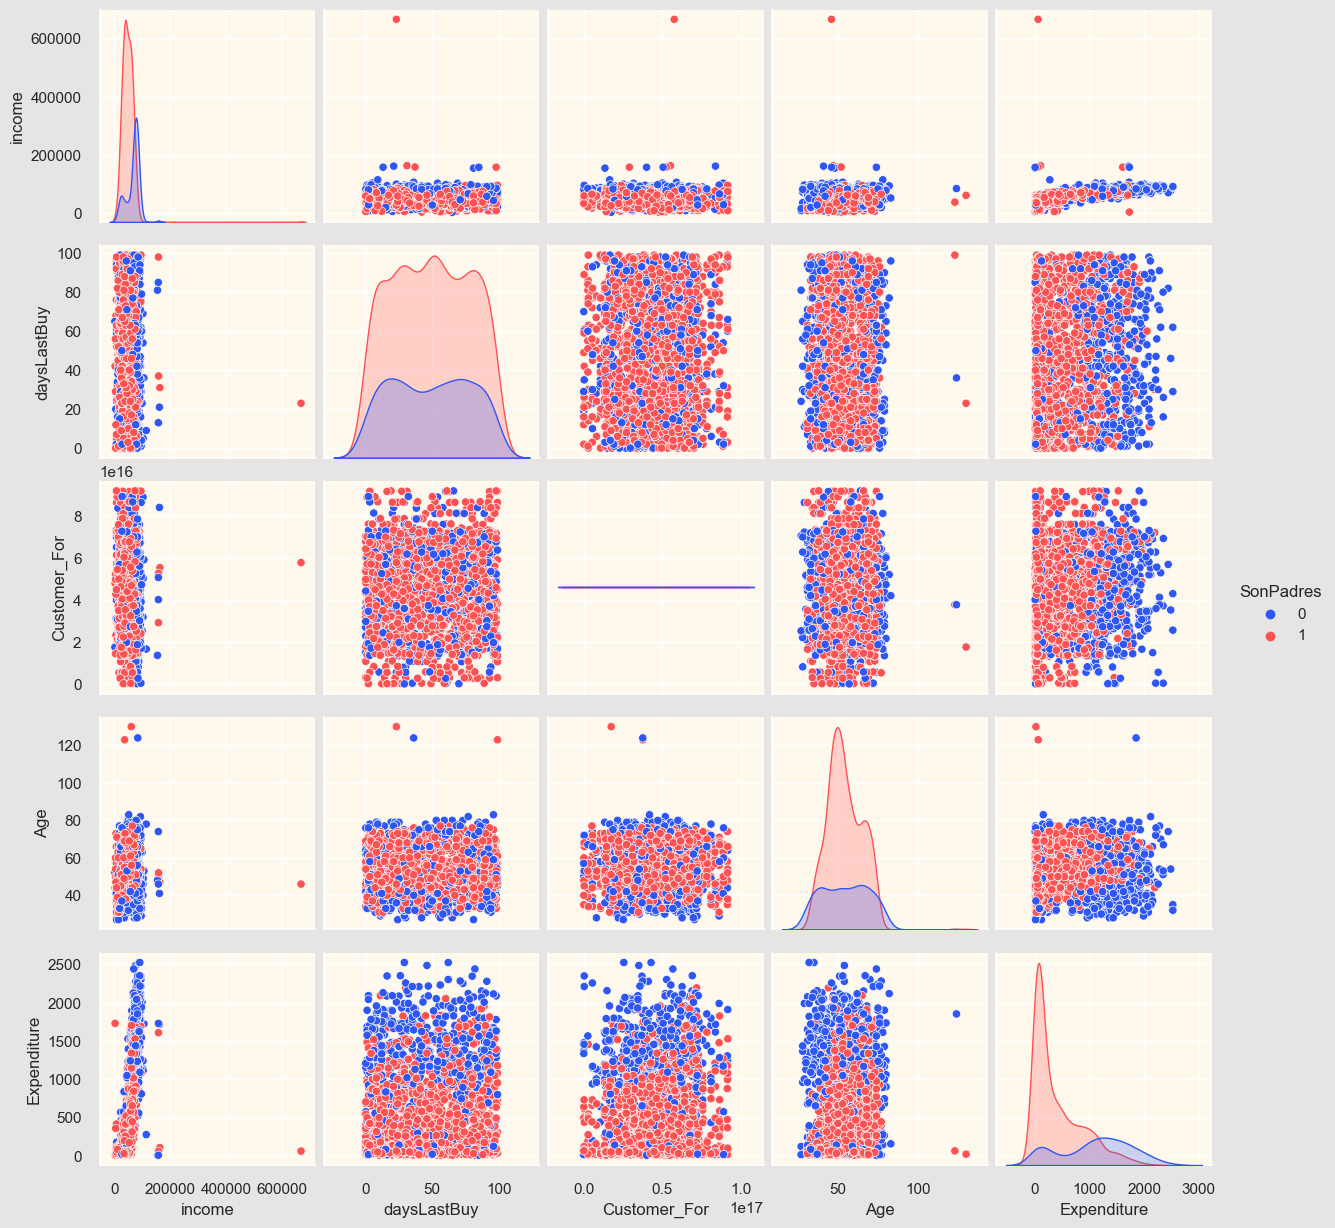

In [11]:
## Visualizar algunas Variables

#Edtar Preferencias
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#e6e5e3"})
pallet = ["#2f57f7", "#92c1f7", "#c1d1f7", "#c8cede", "#ab7878", "#f36060"]
cmap = colors.ListedColormap(["#2f57f7", "#92c1f7", "#c1d1f7", "#c8cede", "#ab7878", "#f36060"])

## sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
## Antes pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
## cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Visualizando 
To_Plot = [ "income", "daysLastBuy", "Customer_For", "Age", "Expenditure", "SonPadres"]
   
print("Ser padres vs algunas variables: Ingreso, última compra, Edad, Gasto, Padres")
plt.figure()
sns.pairplot(data[To_Plot], hue= "SonPadres",palette= (["#2f57f7","#ff5252"]))
#Taking hue 
plt.show()

In [12]:
# Eliminar outliers
data = data[(data["Age"]<90)]
data = data[(data["income"]<600000)]
print("El Total de Filas despúes de remover Ourliers en Edad e Ingresos:", len(data))

El Total de Filas despúes de remover Ourliers en Edad e Ingresos: 2212


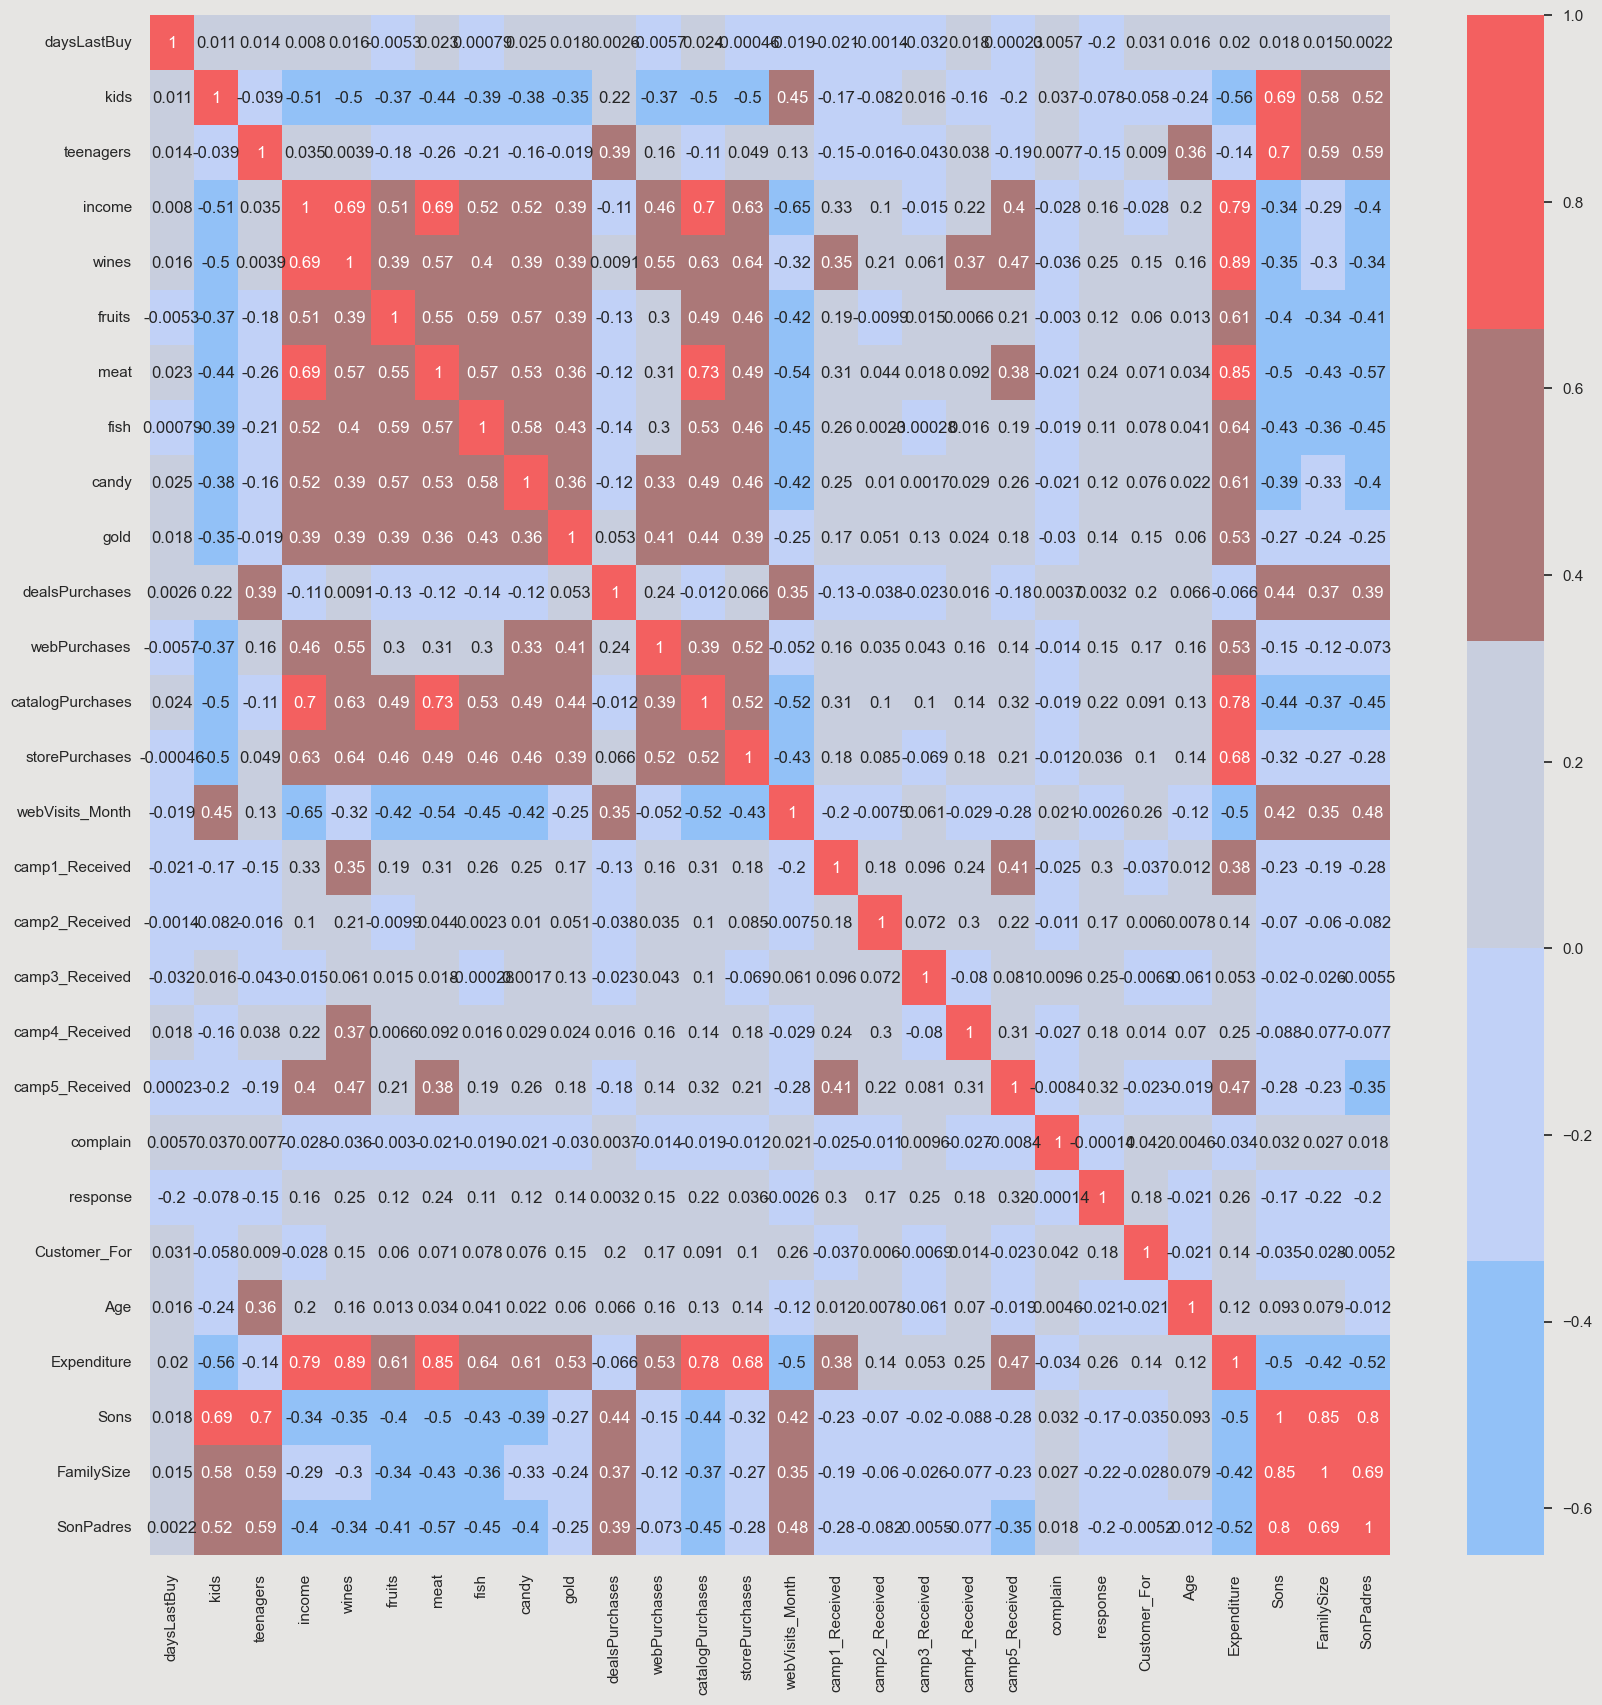

In [13]:
#Matrix de Correlación 

corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [14]:
#Obtener la Lista de las Variables Categóricas 
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Variables de tipo Categórico en el dataset:", object_cols)

Variables de tipo Categórico en el dataset: ['Group_Living', 'Education']


In [15]:
# Formatear las variables a tipo númerico 

LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("Todas las variables son ahora númericas")

Todas las variables son ahora númericas


In [16]:
# Crear una copia del dataset 

ds = data.copy()
# Crear un subconjunto de datos eliminando las variables con ofertas y promociones recibidas 

cols_del = ['camp1_Received', 'camp2_Received', 'camp3_Received', 'camp4_Received', 'camp5_Received', 'complain', 'response']
ds = ds.drop(cols_del, axis=1)

#Escalando los datos

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("Todas las variables han sido escaladas")

## Se escalan los datos para qeu tengan una media igual a 0 y una desviación estándar igual a uno.
## Es útil para trabajar con modelos que asumen que las variables tienen una distribución normal

Todas las variables han sido escaladas


In [17]:
# Datos Escalados que se utilizarán para reducir la dimensionalidad
print("Dataset para usar en el modelado:")
scaled_ds.head()

Dataset para usar en el modelado:


,daysLastBuy,kids,teenagers,income,wines,fruits,meat,fish,candy,gold,...,storePurchases,webVisits_Month,Customer_For,Age,Expenditure,Group_Living,Sons,FamilySize,SonPadres,Education
0,0.310353,-0.822754,-0.929699,0.287105,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139,-0.893586
1,-0.380813,1.040021,0.908097,-0.260882,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456,-0.893586
2,-0.795514,-0.822754,-0.929699,0.913196,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139,-0.893586
3,-0.795514,1.040021,-0.929699,-1.176114,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456,-0.893586
4,1.554453,1.040021,-0.929699,0.294307,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456,0.571657


In [18]:
# Iniciar Análisis de Componentes (PCA) para reducir las variables



pca = PCA(n_components=8)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["variable1","variable2", "variable3", "variable4",
                                                         "variable5", "variable6","variable7", "variable8"]))


## PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["variable1","variable2", "variable3", "variable4",
                                                        #   "variable5", "variable6","variable7", "variable8", 
                                                        # "variable9", "variable10"]))
PCA_ds.describe().T

## pca.explained_variance_ratio_
## pca.explained_variance_ratio_.sum()









,count,mean,std,min,25%,50%,75%,max
variable1,2212.0,2.188324e-17,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
variable2,2212.0,4.527220e-17,1.706839,-4.312182,-1.328322,-0.158129,1.242288,6.142725
variable3,2212.0,2.384068e-17,1.221957,-3.530474,-0.828788,-0.021930,0.799415,6.615178
variable4,2212.0,8.720671e-18,1.147715,-3.123902,-0.763618,-0.008840,0.899690,3.388925
variable5,2212.0,3.111837e-17,1.053866,-3.066254,-0.741468,0.005256,0.687358,3.105215
variable6,2212.0,7.695522e-17,1.004180,-2.286661,-0.825909,0.012649,0.812785,2.469180
variable7,2212.0,1.139334e-16,0.973619,-3.364842,-0.697282,-0.038994,0.644398,3.520063
variable8,2212.0,1.229677e-17,0.918972,-4.370876,-0.531911,0.051170,0.551576,4.482363


El Método del Codo para determinar el número de Clusters que deberíamos conformar:


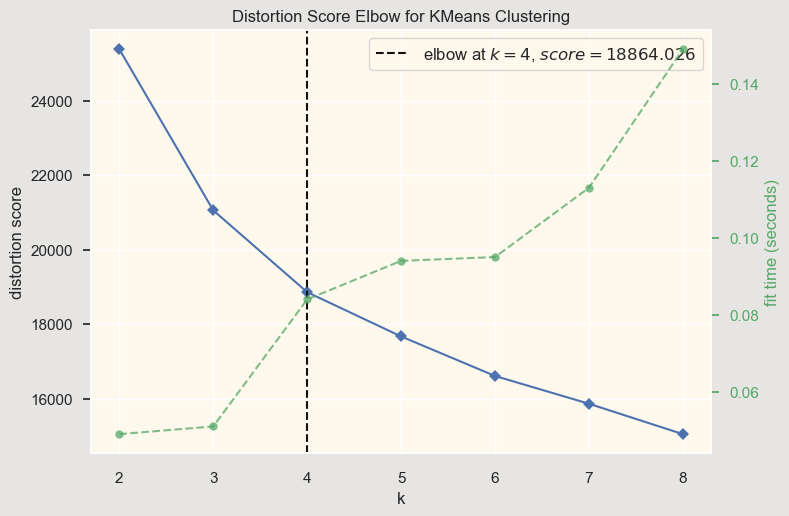

In [19]:
# Quick examination of elbow method to find numbers of clusters to make

print('El Método del Codo para determinar el número de Clusters que deberíamos conformar:')
Elbow_M = KElbowVisualizer(KMeans(), k=(8))
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [20]:
#Iniciando la agrupación o Modelo Clustering


AC = AgglomerativeClustering(n_clusters=4)

# Ajustar el Model y Predecir los Clusters 
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
# Agregando los Clusters al dataframe original 

data["Clusters"]= yhat_AC

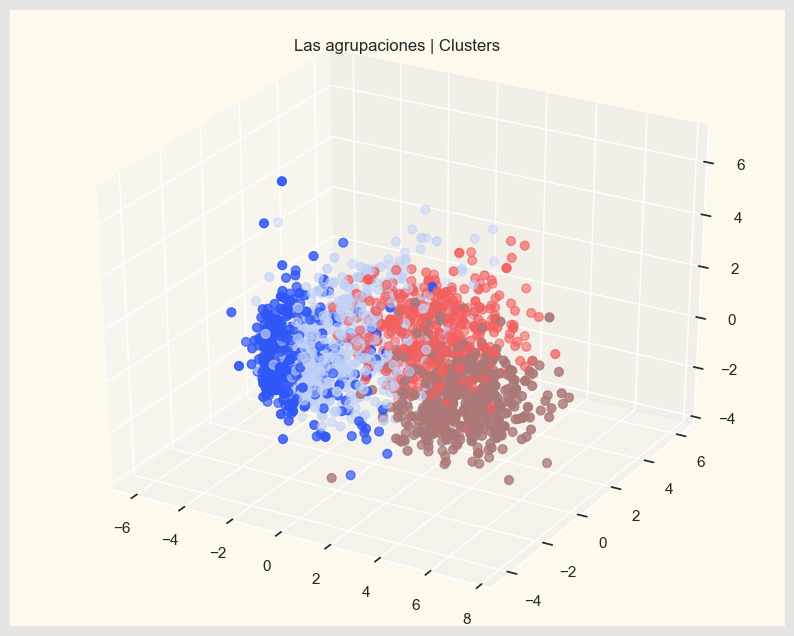

In [21]:
#Visualizando los Clusters o Agrupaciones

#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["variable1"]
y =PCA_ds["variable2"]
z =PCA_ds["variable3"]



fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("Las agrupaciones | Clusters")
plt.show()

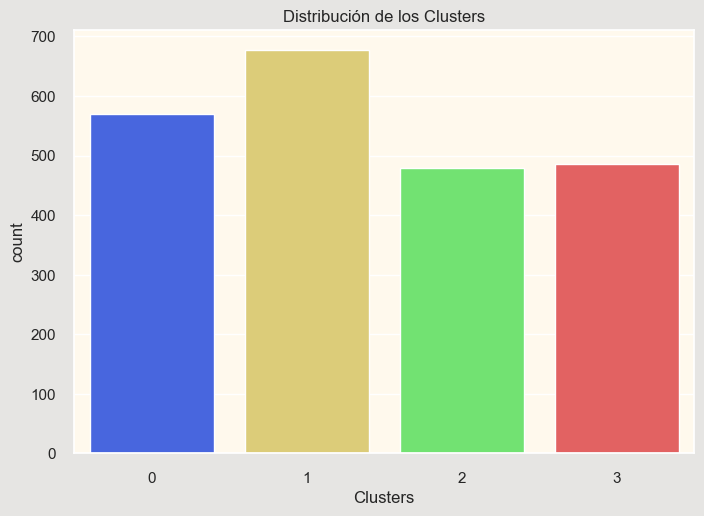

In [22]:
#Visualizar el Conteo por Agrupaciones

pal = ["#2f57f7","#edd768", "#5ff55f","#f74d4d"]

pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribución de los Clusters")
plt.show()

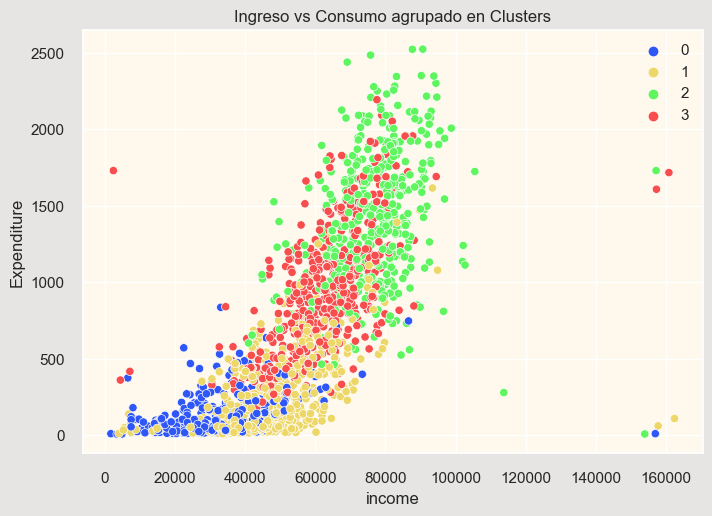

In [23]:
### Income vs Expenditure por Clusters

pl = sns.scatterplot(data=data, x=data["income"], y=data["Expenditure"], hue=data["Clusters"], palette = pal)

pl.set_title("Ingreso vs Consumo agrupado en Clusters")
plt.legend()
plt.show()




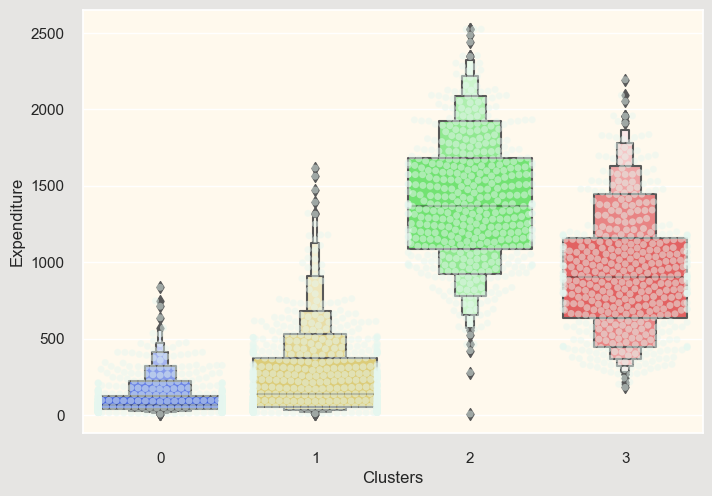

In [24]:
## distribución del consumo en el supermercado por Grupos/Clusters

plt.figure()
pl = sns.swarmplot(x=data["Clusters"], y=data["Expenditure"], color = "#e6f7f0", alpha = 0.5)
pl = sns.boxenplot(x=data["Clusters"], y=data["Expenditure"], palette = pal)
plt.show()



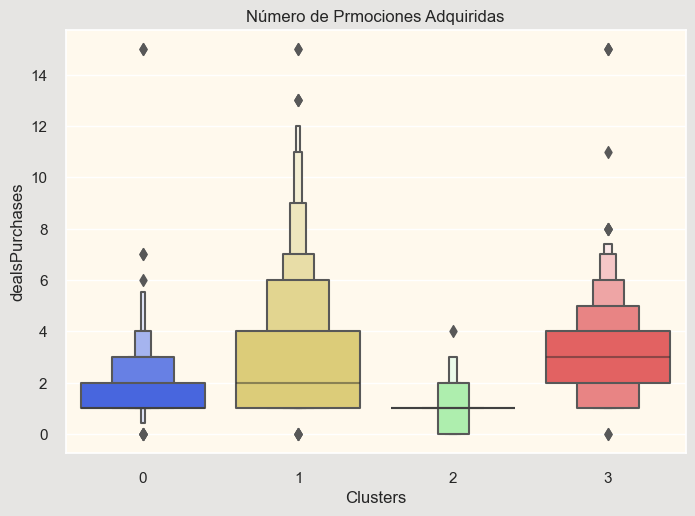

In [25]:
## Visualizar la distribución del número de Deals 

plt.figure()
pl=sns.boxenplot(y=data["dealsPurchases"], x=data["Clusters"], palette = pal)
pl.set_title("Número de Prmociones Adquiridas")
plt.show()


<Figure size 800x550 with 0 Axes>

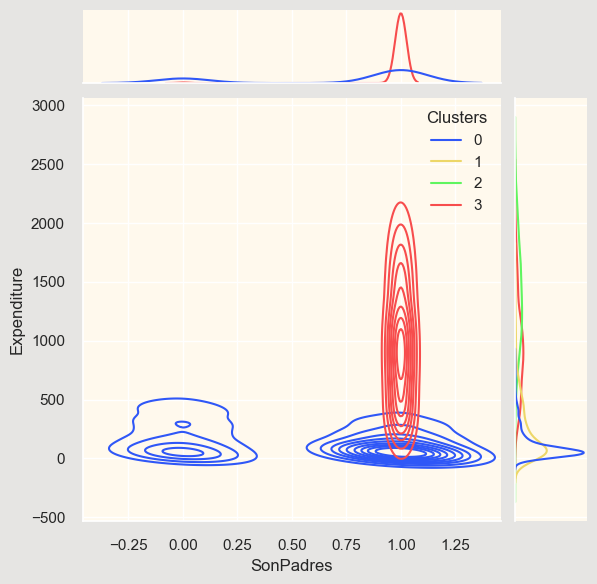

<Figure size 800x550 with 0 Axes>

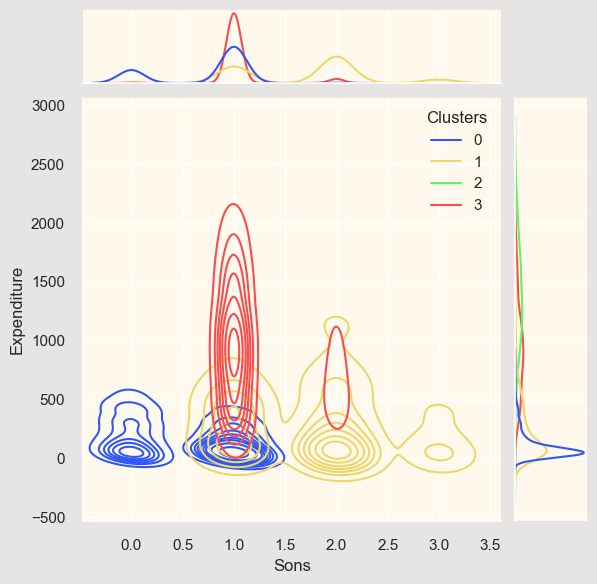

<Figure size 800x550 with 0 Axes>

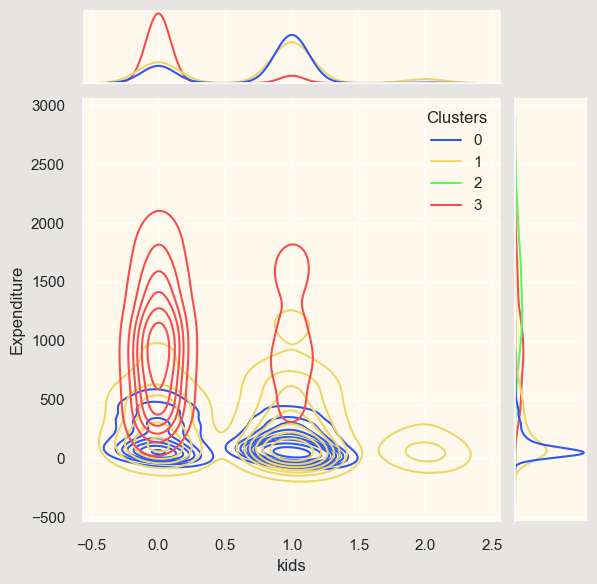

<Figure size 800x550 with 0 Axes>

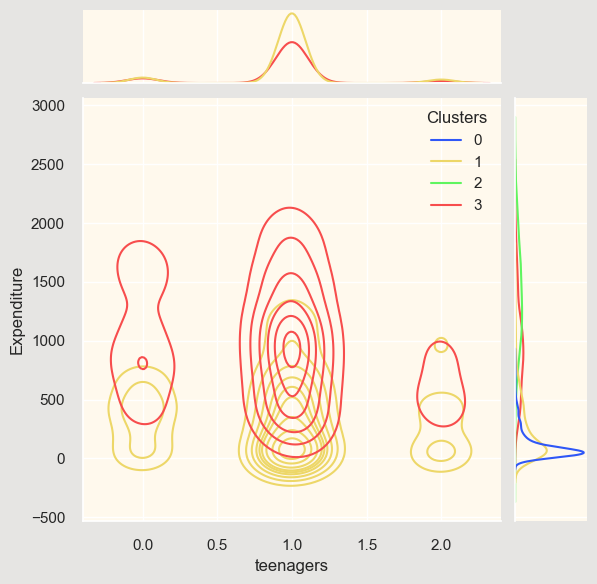

<Figure size 800x550 with 0 Axes>

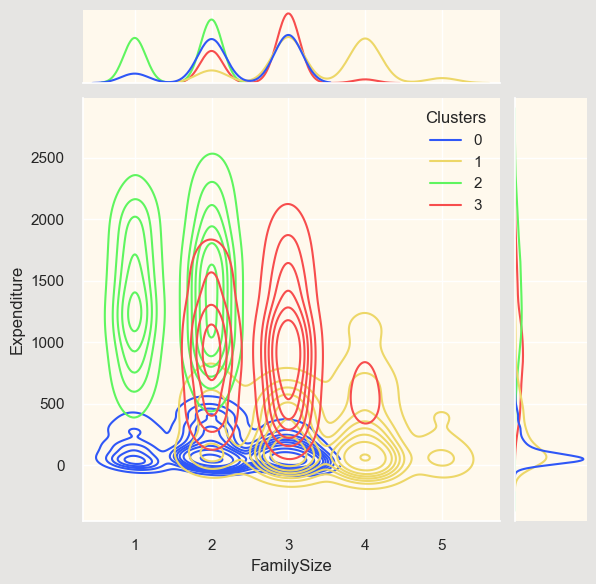

<Figure size 800x550 with 0 Axes>

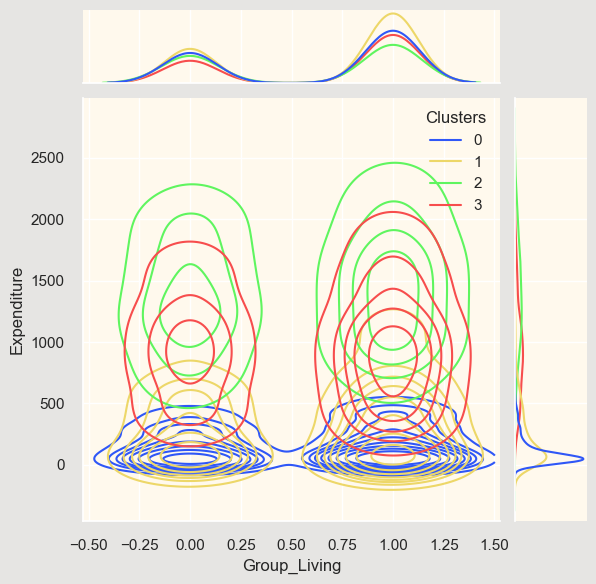

<Figure size 800x550 with 0 Axes>

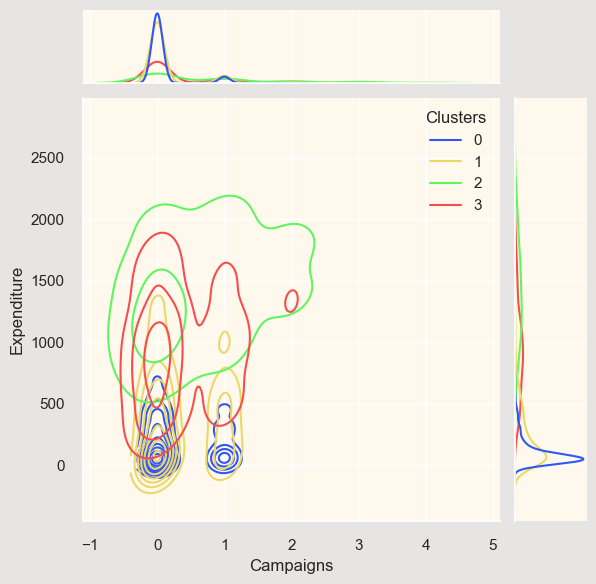

<Figure size 800x550 with 0 Axes>

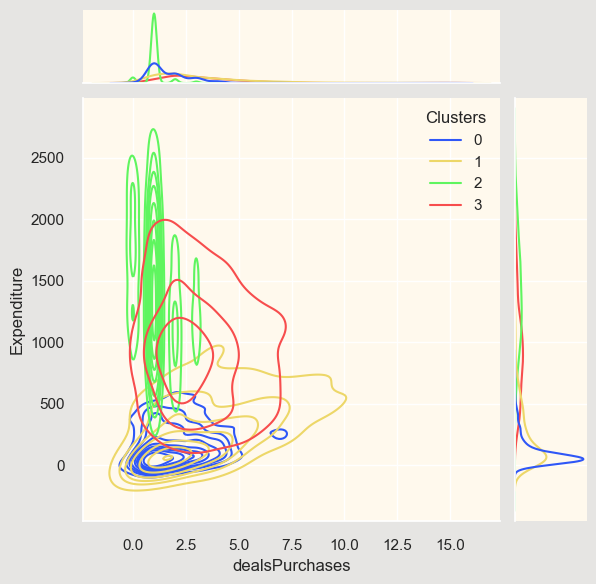

<Figure size 800x550 with 0 Axes>

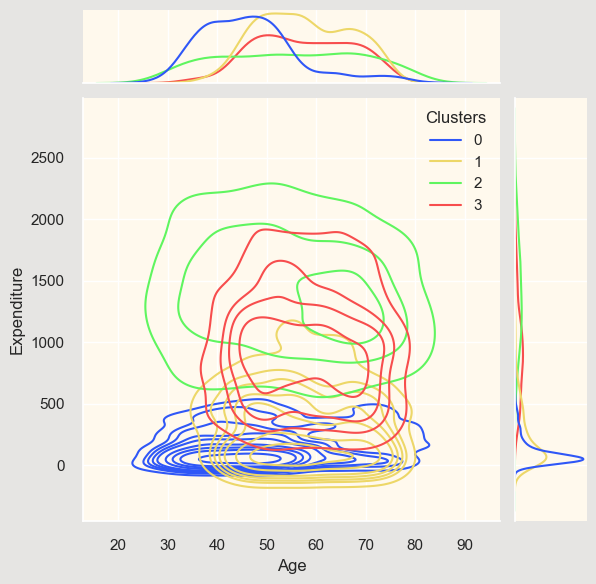

<Figure size 800x550 with 0 Axes>

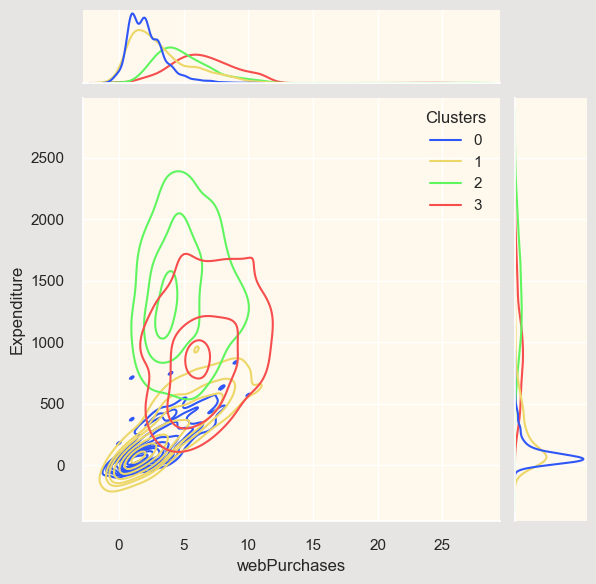

<Figure size 800x550 with 0 Axes>

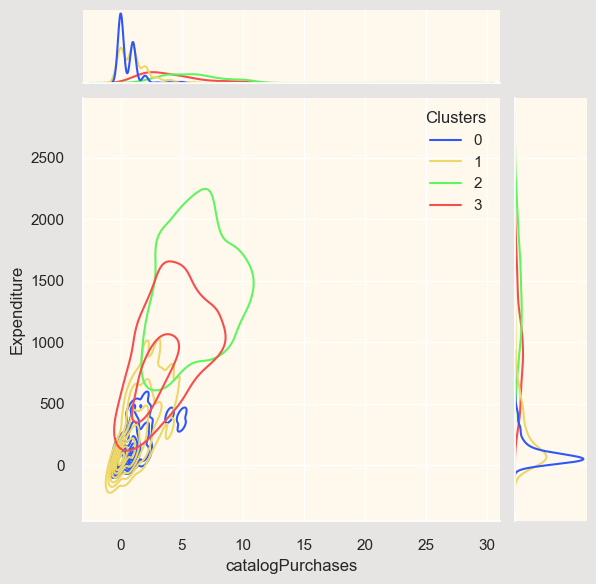

In [29]:
### Perfilando los grupos de Clusters


data["Campaigns"] = data["camp1_Received"] + data["camp2_Received"] + data["camp3_Received"] + data["camp4_Received"] + data["camp5_Received"]


Personal = ["SonPadres", "Sons", "kids","teenagers", "FamilySize", "Group_Living", "Campaigns", "dealsPurchases", "Age", "webPurchases", "catalogPurchases"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Expenditure"], hue=data["Clusters"], kind="kde", palette=pal)
    plt.show()


In [ ]:
### Conclusiones finales


- Grupo Rojo (Cluster 3):
    - Son mayores de 40 años con Ingresos altos
    - Son Padres de Familia, la mayoría de adolescentes
    - Son un grupo familiar de 3 miembros
    - Reaccionan muy bien a las prmociones, y en menor medida a las campañas
    
- Grupo Verde (Cluster 2): 
    - Son un grupo de diversas edades, a partir de los 30 años
    - Son el grupo con ingresos más altos y con el mayor consumo en el supermercado
    - No son Padres
    - Es un grupo de Parejas o Solteros
    - Tienen una alta sensibilidad a las campañas, pero muy baja a a las promociones
- Grupo Amarillo (Cluster 1):
    - Tienen ingresos promedios y bajo consumo en supermercado
    - Son Padres de familia, con al menos un niño y un adolescente en casa
    - Tienen alta sensibilidad a las promociones, y moderada a las campañas
    - Son adultos a partir de los 40 años
    - Es un grupo familiar mayoritaríamente 4 miembros
- Grupo Azul (Cluster 0):
    - Son el grupo más jóven, a partir de los 20 años
    - Tienen ingresos bajos, y el menor consumo en el supermercado
    - Tienen una aceptación moderada a baja de campañas y promociones
    - Un porcentaje considerable son padres de por lo menos 1 niño

